In [1]:
!unzip Cat.zip
!mv ResizedCat ../Cat

Archive:  Cat.zip
replace ResizedCat/image3659.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
!unzip Dog.zip
!mv ResizedDog Dog

Archive:  Dog.zip
 extracting: ResizedDog/image3814.jpg  
 extracting: ResizedDog/image8799.jpg  
 extracting: ResizedDog/image9487.jpg  
 extracting: ResizedDog/image8941.jpg  
 extracting: ResizedDog/image11971.jpg  
 extracting: ResizedDog/image1965.jpg  
 extracting: ResizedDog/image4809.jpg  
 extracting: ResizedDog/image11965.jpg  
 extracting: ResizedDog/image1971.jpg  
 extracting: ResizedDog/image6978.jpg  
 extracting: ResizedDog/image9493.jpg  
 extracting: ResizedDog/image8955.jpg  
 extracting: ResizedDog/image3800.jpg  
 extracting: ResizedDog/image6950.jpg  
 extracting: ResizedDog/image7496.jpg  
 extracting: ResizedDog/image6788.jpg  
 extracting: ResizedDog/image3828.jpg  
 extracting: ResizedDog/image5281.jpg  
 extracting: ResizedDog/image3196.jpg  
 extracting: ResizedDog/image2288.jpg  
 extracting: ResizedDog/image4821.jpg  
 extracting: ResizedDog/image1781.jpg  
 extracting: ResizedDog/image11795.jpg  
 extracting: ResizedDog/image1959.jpg  
 extracting: Resize

In [2]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.0 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 40.7 MB/s eta 0:0

In [4]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

2022-08-10 19:59:18.185055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-10 19:59:18.185078: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


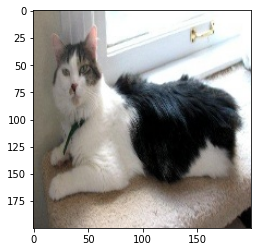

In [9]:
# Sample a cat image
sample_cat = mpimg.imread('../Cat/image3814.jpg')
plt.imshow(sample_cat)
plt.show()

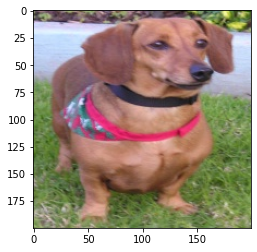

In [10]:
# Sample a dog image
sample_dog = mpimg.imread('../Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [13]:
# Count total images
data_dir = pathlib.Path('./')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

25000

In [14]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WITDH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32

# etiquetar imagenes con nombre de la carpeta
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMAGE_WITDH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 25000 files belonging to 3 classes.
Using 20000 files for training.


2022-08-10 20:19:19.728833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-10 20:19:19.729003: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-10 20:19:19.729364: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jgayoso): /proc/driver/nvidia/version does not exist
2022-08-10 20:19:19.733809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

Found 24946 files belonging to 2 classes.
Using 4989 files for validation.


In [36]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [38]:
# Create the deep learning architecture
IMAGE_CHANNELS=3
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 97, 97, 64)      

In [39]:
# Fit the model
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
624/624 [==============================] - 681s 1s/step - loss: 0.6773 - accuracy: 0.6697 - val_loss: 0.5172 - val_accuracy: 0.7476
Epoch 2/10
624/624 [==============================] - 681s 1s/step - loss: 0.4913 - accuracy: 0.7645 - val_loss: 0.6911 - val_accuracy: 0.6675
Epoch 3/10
624/624 [==============================] - 676s 1s/step - loss: 0.4238 - accuracy: 0.8058 - val_loss: 0.5371 - val_accuracy: 0.7492
Epoch 4/10
624/624 [==============================] - 671s 1s/step - loss: 0.3847 - accuracy: 0.8244 - val_loss: 0.6315 - val_accuracy: 0.7260
Epoch 5/10
624/624 [==============================] - 683s 1s/step - loss: 0.3272 - accuracy: 0.8572 - val_loss: 0.4854 - val_accuracy: 0.7891
Epoch 6/10
624/624 [==============================] - 685s 1s/step - loss: 0.2645 - accuracy: 0.8880 - val_loss: 0.5477 - val_accuracy: 0.7879
Epoch 7/10
624/624 [==============================] - 689s 1s/step - loss: 0.2066 - accuracy: 0.9145 - val_loss: 1.1224 - val_accuracy: 0.6977